In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv("DMV_written_tests.csv")

In [4]:
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
data.shape

(100, 3)

In [91]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values

In [32]:
results = data[['Results']].values

## Data visualization

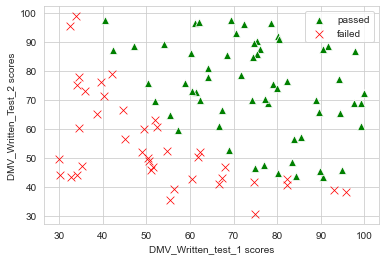

In [33]:
passed=(results==1).reshape(100,1)
failed=(results==0).reshape(100,1)
ax=sns.scatterplot(x=scores[passed[:,0],0],
                  y=scores[passed[:,0],1],
                  marker="^",
                  color ='green',
                  s=60)
sns.scatterplot(x=scores[failed[:,0],0],
                y=scores[failed[:,0],1],
                marker="x",
                color='red',
                s=60)
 
ax.set(xlabel="DMV_Written_test_1 scores",ylabel="DMV_Written_Test_2 scores")
ax.legend(['passed','failed'])
plt.show();

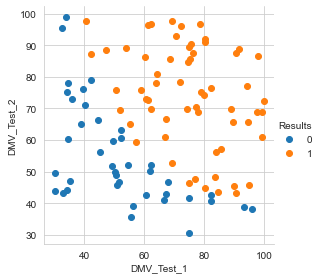

In [35]:
# Other Method to plot
sns.set_style("whitegrid")
sns.FacetGrid(data, hue= "Results",height = 4) \
    .map(plt.scatter, "DMV_Test_1", "DMV_Test_2") \
    .add_legend()

plt.show()

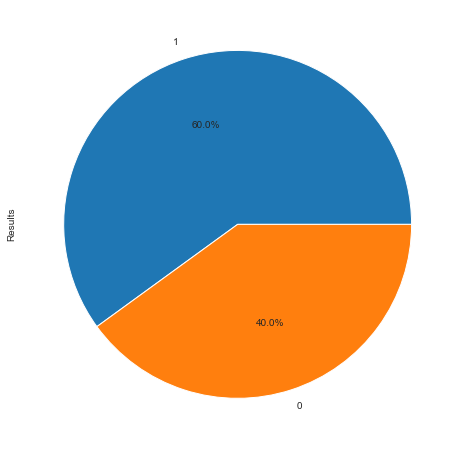

In [34]:
# Pie plot to see percentage of passed and failed students

data.Results.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.show()

## Define logistic sigmoid function

In [40]:
def sigm(z):
    return 1/(1+np.exp(-z))


In [41]:
sigm(0)

0.5

## Compute the cost function

In [114]:
def compute_cost(x,y,theta):
    '''This function will return cost, taking input as x,y, theta'''
    m = len(y)
    y_pred = sigm(np.dot(x,theta))
    error=(y*np.log(y_pred))+(1-y)*(np.log(1-y_pred))
    cost=-(1/m)*sum(error)
    gradient=(1/m)*(np.dot(x.transpose(),(y_pred-y)))
    return cost[0], gradient

## Cost and gradient initialization

In [95]:
## Feature standerdization

mean_scores=np.mean(scores, axis=0)
std_scores=np.std(scores, axis=0)
scores=(scores-mean_scores)/std_scores



In [109]:
# Dimention balancing and theta initialization, adding ones in scores 

rows=scores.shape[0]
cols=scores.shape[1]
X=np.append(np.ones((rows,1)), scores, axis=1)
y=results.reshape(rows,1)
theta_init=np.zeros((cols+1,1))

In [106]:
X.shape

(100, 3)

In [107]:
y.shape

(100, 1)

In [108]:
theta_init.shape

(3, 1)

In [119]:
cost, gradient= compute_cost(X,y,theta_init)
print("cost at initialization: \n", cost)
print("gradient at initialization:\n", gradient)

cost at initialization: 
 0.693147180559946
gradient at initialization:
 [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Gradient Descent

In [122]:
def gardient_descent(x,y, theta, alpha, iterations):
    costs=[]
    for i in range(iterations):
        cost,gradient = compute_cost(X,y,theta)
        theta-=(alpha*gradient)
        costs.append(cost)
    return theta, costs

In [123]:
theta, costs =  gardient_descent(X,y,theta_init,1,200)

In [124]:
print("theta after running gradient descent :",theta)
print("Resulting cost:",costs[-1])

theta after running gradient descent : [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.2048938203512014


## Plotting the Convergence of

Text(0.5, 1.0, 'Convergance of cost with itration')

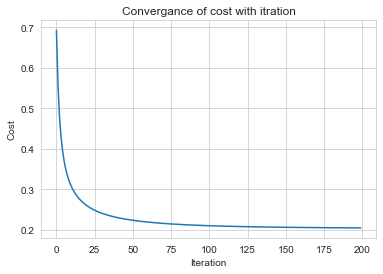

In [132]:
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Convergance of cost with itration")

## Plotting the decision boundary

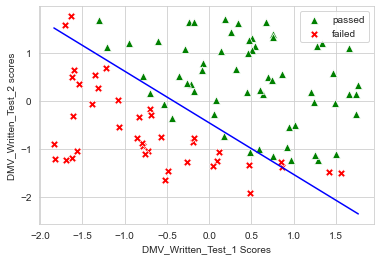

In [141]:
ax=sns.scatterplot(x=X[passed[:,0],1],
                  y=X[passed[:,0],2],
                  marker="^",
                  color ='green',
                  s=60)
sns.scatterplot(x=X[failed[:,0],1],
                y=X[failed[:,0],2],
                marker="X",
                color='red',
                s=60)
ax.legend(['passed','failed'])
ax.set(xlabel="DMV_Written_Test_1 Scores", ylabel="DMV_Written_Test_2 scores")
x_boundary=np.array([np.min(X[:,1]),np.max(X[:,1])])
y_boundary=-(theta[0]+theta[1]*x_boundary)/theta[2]
sns.lineplot(x=x_boundary, y=y_boundary, color="blue")
plt.show();

## Testing model

In [156]:
def predict(theta, x):

    results = np.dot(x,theta)

    return results 

In [184]:
test = np.array([50,79])
test= (test-mean_scores)/std_scores
test= np.append((np.ones(1), test))

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [182]:
test.shape

(3,)

In [164]:
theta.shape


(3, 1)

In [168]:
results = np.dot(theta, test)
print(results)

[[ 75.42529318 119.17196323]
 [177.3438102  280.20322012]
 [164.69185467 260.21313037]]


In [149]:
test.dot(theta)

ValueError: shapes (2,) and (3,1) not aligned: 2 (dim 0) != 3 (dim 0)

In [150]:
theta

array([[1.50850586],
       [3.5468762 ],
       [3.29383709]])

In [192]:
A=np.array([[1,2],[3,4]])

x=np.array([1,2])

y=np.dot(A,x)

print(y.shape)
print

(2,)
(2,)
(2, 2)


In [191]:
x2=x[:,np.newaxis]

y2=np.dot(A,x2)

y2.shape

(2, 1)